In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from symplectic_2d import *

# Example 1 — Symplectic Integrator vs. RK45: Energy Conservation

In this first example, we compare two integrators:
- **Symplectic integrator (Symplectic Euler)**
- **Classical RK45 integrator (Runge–Kutta solver)**

We use the Hamiltonian of two weakly coupled oscillators:
$$ H = \frac{p_1^2 + p_2^2}{2} + \frac{x_1^2 + x_2^2}{2} + 0.1\, x_1 x_2.$$

🎯 **Visual Objective**:
➡️ Show that energy remains almost constant with the symplectic integrator,
➡️ While RK45 gradually drifts.
This is a great example of symplectic geometry in action!

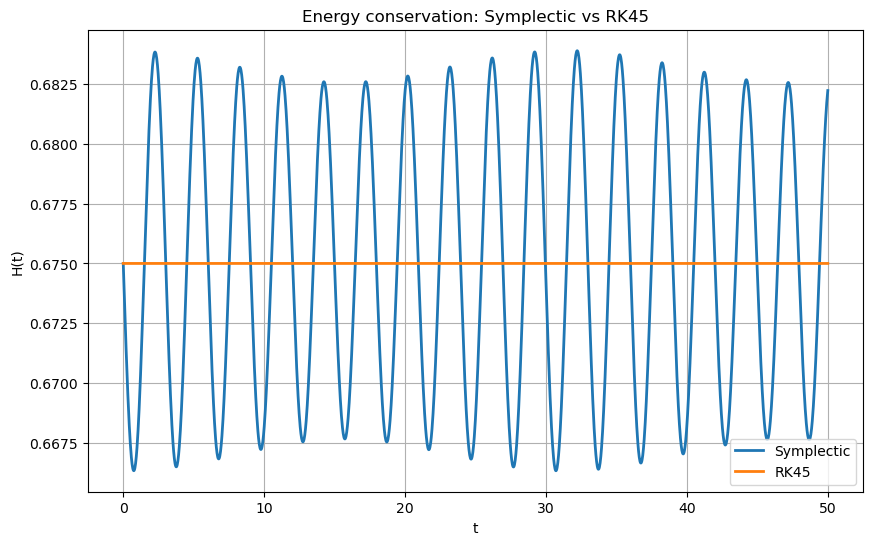

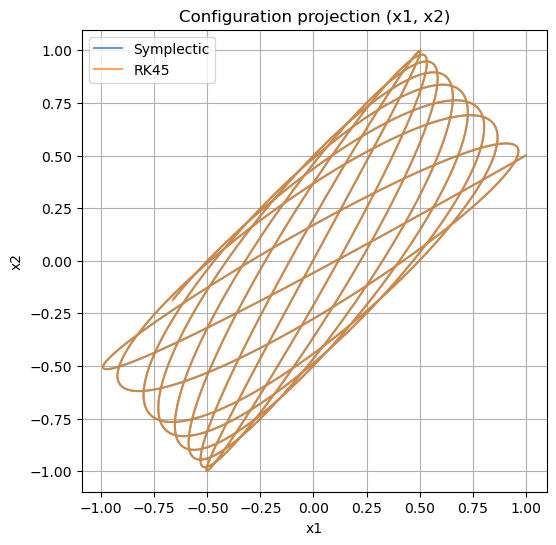

In [3]:
# ----------------------
# Definition of the Hamiltonian
# ----------------------
x1, p1, x2, p2 = symbols("x1 p1 x2 p2", real=True)
H = (p1**2 + p2**2)/2 + (x1**2 + x2**2)/2 + 0.1 * x1 * x2
z0 = (1, 0, 0.5, 0)
tspan = (0, 50)
traj_symp = hamiltonian_flow_4d(H, z0, tspan, integrator='symplectic', n_steps=2000)
traj_rk45 = hamiltonian_flow_4d(H, z0, tspan, integrator='rk45', n_steps=3000)

# ----------------------
# Energy plot
# ----------------------
plt.figure(figsize=(10,6))
plt.plot(traj_symp['t'], traj_symp['energy'], label="Symplectic", linewidth=2)
plt.plot(traj_rk45['t'], traj_rk45['energy'], label="RK45", linewidth=2)
plt.xlabel("t")
plt.ylabel("H(t)")
plt.title("Energy conservation: Symplectic vs RK45")
plt.legend()
plt.grid()
plt.show()

# ----------------------
# x1-x2 projection
# ----------------------
plt.figure(figsize=(6,6))
x_symp, y_symp, _ = project(traj_symp, plane='xy')
x_rk, y_rk, _ = project(traj_rk45, plane='xy')
plt.plot(x_symp, y_symp, label="Symplectic", alpha=0.7)
plt.plot(x_rk, y_rk, label="RK45", alpha=0.7)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Configuration projection (x1, x2)")
plt.legend()
plt.grid()
plt.show()


# Example 2 — Poincaré Section: Transition from Regular Regime to Chaos
In this example, we study a nonlinear Hamiltonian system:
$$ H = \frac{p_1^2 + p_2^2}{2} + \frac{x_1^2 + x_2^2}{2} + \varepsilon\, x_1^2 x_2^2.$$
By varying the parameter \( \varepsilon \), we observe:
- For **ε = 0.01**, the system is quasi-integrable → invariant tori.
- For **ε = 0.1**, resonances appear.
- For **ε = 0.5**, the tori break → **chaos** (KAM).
The Poincaré section used is:
$$ \Sigma = \{ x_2 = 0,\ \dot{x}_2 > 0 \}.$$
This is one of the most illustrative visualizations of the birth of chaos.


===== ε = 0.01 =====



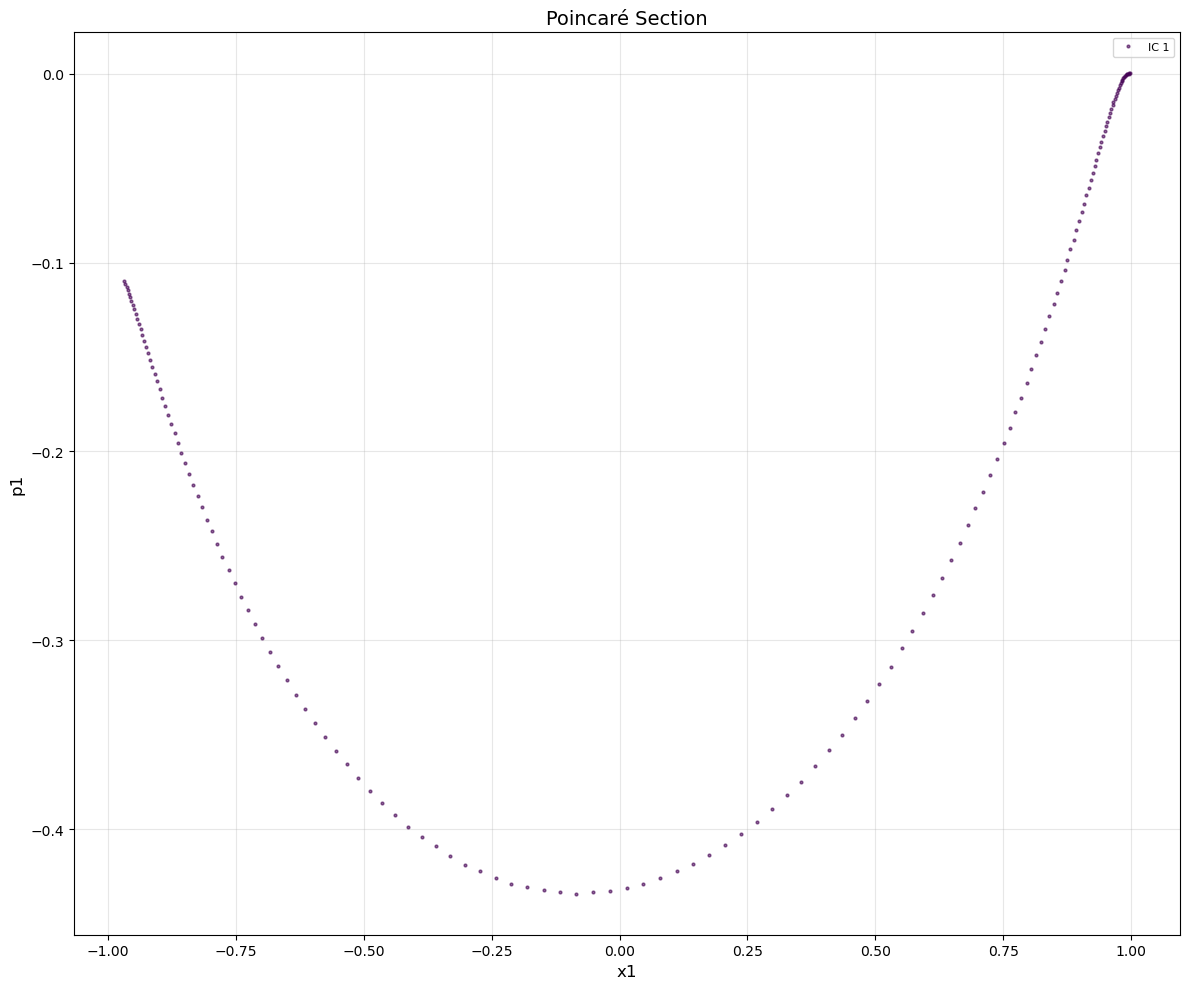


===== ε = 0.1 =====



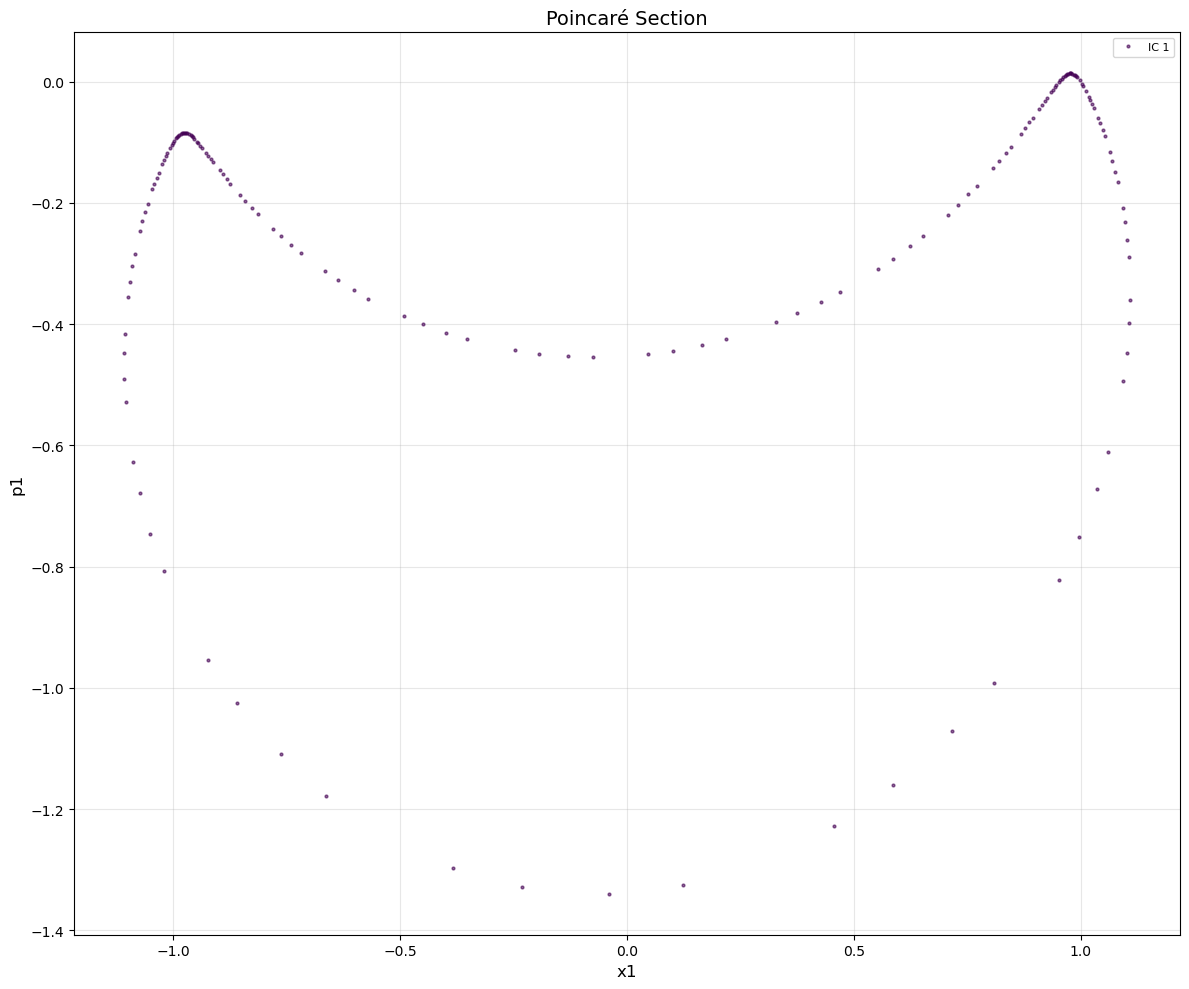


===== ε = 0.5 =====



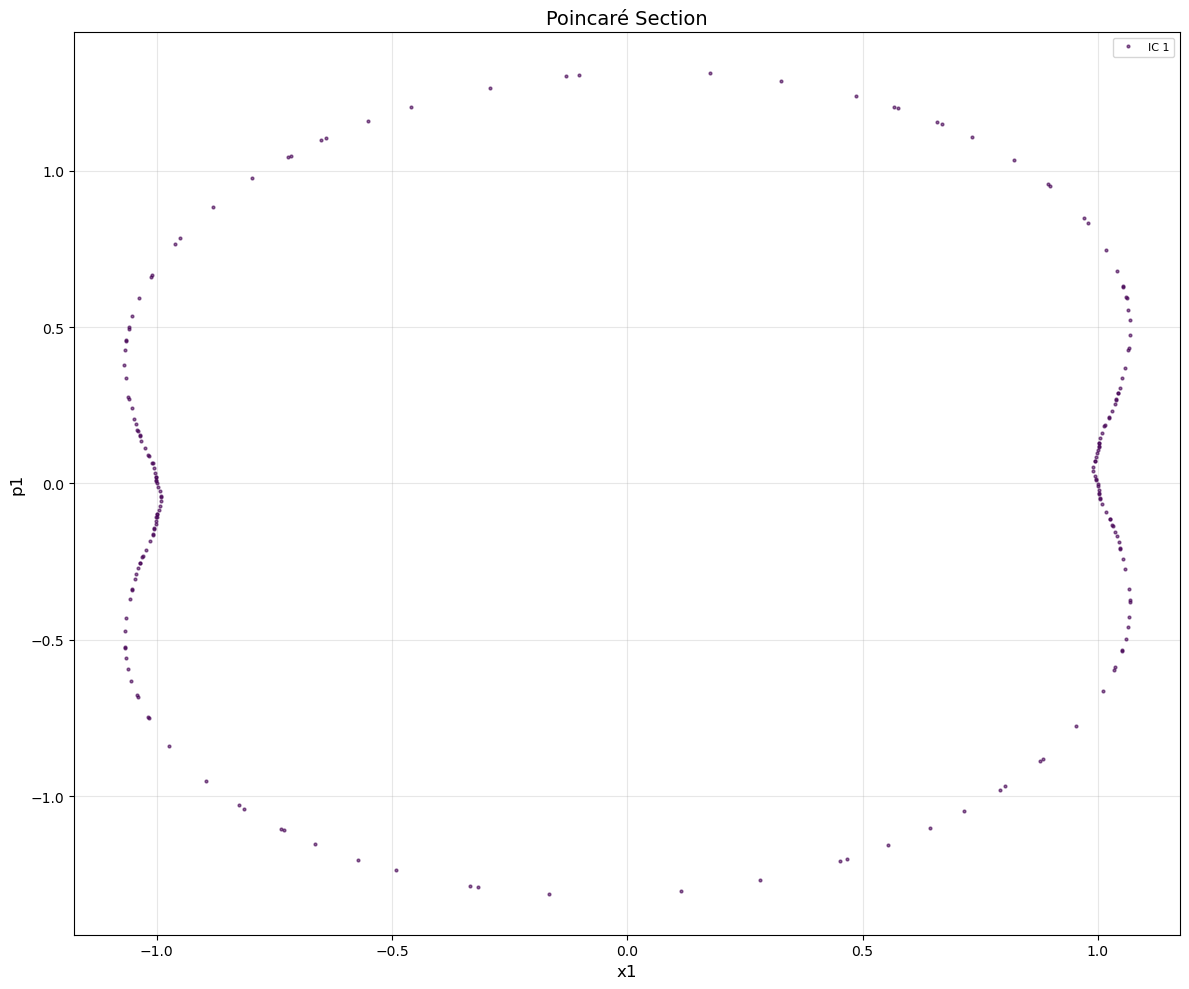

In [6]:
# Define symbolic variables
x1, p1, x2, p2 = symbols("x1 p1 x2 p2", real=True)

# List of epsilon values to test
eps_values = [0.01, 0.1, 0.5]

# Initial conditions for the Poincaré section
z0_list = [(1, 0, 0, 1)]

# Define the Poincaré section parameters: variable, value, and direction
section = {'variable': 'x2', 'value': 0, 'direction': 'positive'}

# Loop over each epsilon value
for eps in eps_values:
    print(f"\n===== ε = {eps} =====\n")

    # Define the Hamiltonian with the current epsilon value
    H = (p1**2 + p2**2 + x1**2 + x2**2)/2 + eps * x1**2 * x2**2

    # Visualize the Poincaré section for the given Hamiltonian, initial conditions, and section parameters
    visualize_poincare_section(H, z0_list, section, tmax=1000, n_returns=1000)


# Example 3 — Monodromy Matrix and Stability of a Periodic Orbit
In this third example, we analyze the stability of a periodic orbit.
For an integrable system such as two independent oscillators:
$$ H = \frac{p_1^2 + p_2^2}{2} + \frac{x_1^2 + x_2^2}{2},$$
a simple orbit (e.g., $ x_1(0)=1, p_1(0)=0 $) is perfectly **stable**.
We compute the **monodromy matrix**, which is the derivative of the flow after one period:
$$ M = D\Phi_T(z_0). $$
The eigenvalues (Floquet multipliers) must satisfy:
- $|\lambda| = 1$ for a stable Hamiltonian system.
Then, we slightly modify the Hamiltonian with a nonlinear perturbation and observe how the eigenvalues move outside the unit circle → instability.
An excellent example to illustrate Floquet theory and Hamiltonian systems.

---

In [5]:
# ------------------------
# Unperturbed Hamiltonian
# ------------------------
x1, p1, x2, p2 = symbols("x1 p1 x2 p2")
H0 = (p1**2 + p2**2 + x1**2 + x2**2)/2
z0 = (1.0, 0.0, 0.0, 0.0)
T = 2*np.pi  # exact period
orbit = hamiltonian_flow_4d(H0, z0, (0, T), integrator="rk45", n_steps=4000)
mono0 = monodromy_matrix(H0, orbit)
print("Floquet multipliers (H0):")
print(mono0["floquet_multipliers"])

# ------------------------
# Perturbed Hamiltonian
# ------------------------
eps = 0.2
H_pert = H0 + eps * x1 * x2**2
orbit_pert = hamiltonian_flow_4d(H_pert, z0, (0, T), integrator="rk45", n_steps=4000)
mono1 = monodromy_matrix(H_pert, orbit_pert)
print("\nFloquet multipliers (perturbed H):")
print(mono1["floquet_multipliers"])
print("\nMagnitudes:", np.abs(mono1["floquet_multipliers"]))


Floquet multipliers (H0):
[1. 1. 1. 1.]

Floquet multipliers (perturbed H):
[1. 1. 1. 1.]

Magnitudes: [1. 1. 1. 1.]
